# Crimes in India - Capstone Project

## Description:

### Important notes.

- By now you have worked on many use cases. As this is a capstone project and absolutely No support will be given from the technical team so avoid asking questions on the capstone project.

- When you are analyzing any situation if you don’t get proper data/information or are in doubt about anything. You are free to make assumptions and proceed. But make sure whenever you assume something you MUST write what is your assumption w.r.t that situation so that we understand your work accordingly.

- You can merge all the files or work on them individually it's up to you how you think and want to deal with it.

- You can make use of any column data for your analysis there is no fixed procedure to follow as long as your analysis makes sense.

- A simple point to keep in mind, the more the analysis is the better.

- For every analysis, document your analysis within the jupyter notebook (in the same cell where your graph or code exists)

- Write Phase number and Req. Numb for every task to identify later. You can combine requirement numbers where it is necessary.

- You need to post your complete work in LMS

- These marks will not be considered for your placement-related activities.

- You can use ANY library/module.


## Phase 4: Unsupervised ML (Clustering)

**Note:**
- This phase requires your general knowledge and thought process to merge the right datasets and the right columns. 
- Collecting quality data is a key factor to create meaningful clusters and Analysis.

**Assumption:** You were given various crime datasets that contains all the DISTRICTS in each state and you were asked to provide the below data to the higher authorities for further action.


***4.1  "Create 3 clusters as below.***

1. Sensitive Area's

2. Moderate Area's

3. Peaceful Area's"

***4.2  Create DataFrame for each cluster that shows data according to the areas.***

***4.3  "Analyse your clusters and prepare a report that explains all your observations.***

**Example -** 

1. What is impacting more crimes in sensitive areas. 

2. What needs to be done to reduce crime. 

3. Most safe and unsafe districts.

4. Etc.......Anything that you observe (If you want, you can plot various graphs to analyze)"


***4.4   Capstone project overall story in your own words. Min 1000 words.***

In [2]:
# Importing required libraries
import pandas as pd # for data wrangling purpose
import numpy as np # Basic computation library
import seaborn as sns # For Visualization 
import matplotlib.pyplot as plt # ploting package
%matplotlib inline
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

In [3]:
# CONSIDERING THE DATABASES THAT CONTAINS THE DISTRICTS

In [4]:
district_wise=pd.read_csv("01_District_wise_crimes_committed_IPC_2001_2012.csv")
district_wise

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,A & N ISLANDS,ANDAMAN,2001,13,0,0,3,0,3,2,...,4,113,0,18,1,9,0,0,310,637
1,A & N ISLANDS,NICOBAR,2001,0,0,0,0,0,0,0,...,0,5,0,1,0,0,0,0,13,21
2,A & N ISLANDS,TOTAL,2001,13,0,0,3,0,3,2,...,4,118,0,19,1,9,0,0,323,658
3,A & N ISLANDS,ANDAMAN,2002,14,3,0,1,0,1,2,...,2,92,0,16,3,4,0,0,316,580
4,A & N ISLANDS,NICOBAR,2002,3,0,1,1,0,1,0,...,0,5,0,1,0,0,0,0,12,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9012,WEST BENGAL,SEALDAH G.R.P.,2012,19,9,2,0,0,0,7,...,0,62,1,14,2,0,0,0,39,657
9013,WEST BENGAL,SILIGURI G.R.P.,2012,4,1,0,0,0,0,3,...,0,0,1,8,1,0,0,0,58,248
9014,WEST BENGAL,SILIGURI_PC,2012,32,6,6,21,0,21,123,...,3,812,3,35,12,370,0,69,385,3023
9015,WEST BENGAL,UTTAR DINAJPUR,2012,110,283,10,92,0,92,306,...,33,1105,9,150,5,623,0,3,1839,5212


In [5]:
# DROPPING SOME COLUMNS WHICH ARE NOT REQUIRED FOR OUR CLUSTERING ANALYSIS!!

In [7]:
district_wise=district_wise[['STATE/UT',
 'DISTRICT',
 'YEAR',
 'MURDER',
 'RAPE',
 'KIDNAPPING & ABDUCTION',
 'DACOITY',
 'ROBBERY',
 'BURGLARY',
 'RIOTS',
 'COUNTERFIETING',
 'ARSON',
 'HURT/GREVIOUS HURT']]

In [8]:
for i in range(len(district_wise['STATE/UT'])):
    if(district_wise['STATE/UT'][i]=='DELHI UT'):
        district_wise['STATE/UT'][i]='DELHI'

In [9]:
district_wise['STATE/UT'].unique()

array(['A & N ISLANDS', 'ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM',
       'BIHAR', 'CHANDIGARH', 'CHHATTISGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'GOA', 'GUJARAT', 'HARYANA',
       'HIMACHAL PRADESH', 'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA',
       'KERALA', 'LAKSHADWEEP', 'MADHYA PRADESH', 'MAHARASHTRA',
       'MANIPUR', 'MEGHALAYA', 'MIZORAM', 'NAGALAND', 'ODISHA',
       'PUDUCHERRY', 'PUNJAB', 'RAJASTHAN', 'SIKKIM', 'TAMIL NADU',
       'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND', 'WEST BENGAL'],
      dtype=object)

In [10]:
district_wise=district_wise[district_wise['DISTRICT']!='TOTAL']

In [11]:
districtwise_sc=pd.read_csv("02_01_District_wise_crimes_committed_against_SC_2001_2012.csv")
districtwise_sc['STATE/UT'].unique()

array(['A & N ISLANDS', 'ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM',
       'BIHAR', 'CHANDIGARH', 'CHHATTISGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'GOA', 'GUJARAT', 'HARYANA',
       'HIMACHAL PRADESH', 'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA',
       'KERALA', 'LAKSHADWEEP', 'MADHYA PRADESH', 'MAHARASHTRA',
       'MANIPUR', 'MEGHALAYA', 'MIZORAM', 'NAGALAND', 'ODISHA',
       'PUDUCHERRY', 'PUNJAB', 'RAJASTHAN', 'SIKKIM', 'TAMIL NADU',
       'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND', 'WEST BENGAL'],
      dtype=object)

In [12]:
districtwise_sc['TOTAL CRIMES AGAINST SC']=districtwise_sc.iloc[:,3:].sum(axis=1)
districtwise_sctot=districtwise_sc[['STATE/UT','DISTRICT','Year','TOTAL CRIMES AGAINST SC']]
districtwise_sctot

,STATE/UT,DISTRICT,Year,TOTAL CRIMES AGAINST SC
0,A & N ISLANDS,ANDAMAN,2001,0
1,A & N ISLANDS,NICOBAR,2001,0
2,A & N ISLANDS,TOTAL,2001,0
3,A & N ISLANDS,ANDAMAN,2002,0
4,A & N ISLANDS,NICOBAR,2002,0
...,...,...,...,...
9013,WEST BENGAL,SEALDAH G.R.P.,2012,0
9014,WEST BENGAL,SILIGURI G.R.P.,2012,0
9015,WEST BENGAL,SILIGURI_PC,2012,0
9016,WEST BENGAL,UTTAR DINAJPUR,2012,1


In [13]:
districtwise_sctot=districtwise_sctot[districtwise_sctot['DISTRICT']!='TOTAL']
districtwise_st=pd.read_csv("02_District_wise_crimes_committed_against_ST_2001_2012.csv")
districtwise_st['STATE/UT'].unique()

array(['A & N ISLANDS', 'ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM',
       'BIHAR', 'CHANDIGARH', 'CHHATTISGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'GOA', 'GUJARAT', 'HARYANA',
       'HIMACHAL PRADESH', 'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA',
       'KERALA', 'LAKSHADWEEP', 'MADHYA PRADESH', 'MAHARASHTRA',
       'MANIPUR', 'MEGHALAYA', 'MIZORAM', 'NAGALAND', 'ODISHA',
       'PUDUCHERRY', 'PUNJAB', 'RAJASTHAN', 'SIKKIM', 'TAMIL NADU',
       'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND', 'WEST BENGAL'],
      dtype=object)

In [14]:
districtwise_st=districtwise_st[districtwise_st['DISTRICT']!='TOTAL']
districtwise_st['TOTAL CRIMES AGAINST ST']=districtwise_st.iloc[:,3:].sum(axis=1)
districtwise_sttot=districtwise_st[['STATE/UT','DISTRICT','Year','TOTAL CRIMES AGAINST ST']]
districtwise_sttot


,STATE/UT,DISTRICT,Year,TOTAL CRIMES AGAINST ST
0,A & N ISLANDS,ANDAMAN,2001,0
1,A & N ISLANDS,NICOBAR,2001,1
3,A & N ISLANDS,ANDAMAN,2002,1
4,A & N ISLANDS,NICOBAR,2002,0
6,A & N ISLANDS,ANDAMAN,2003,1
...,...,...,...,...
9012,WEST BENGAL,PURULIA,2012,1
9013,WEST BENGAL,SEALDAH G.R.P.,2012,0
9014,WEST BENGAL,SILIGURI G.R.P.,2012,0
9015,WEST BENGAL,SILIGURI_PC,2012,8


In [15]:
districtwise_child=pd.read_csv("03_District_wise_crimes_committed_against_children_2001_2012.csv")
districtwise_child['STATE/UT'].unique()

array(['A & N ISLANDS', 'ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM',
       'BIHAR', 'CHANDIGARH', 'CHHATTISGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'GOA', 'GUJARAT', 'HARYANA',
       'HIMACHAL PRADESH', 'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA',
       'KERALA', 'LAKSHADWEEP', 'MADHYA PRADESH', 'MAHARASHTRA',
       'MANIPUR', 'MEGHALAYA', 'MIZORAM', 'NAGALAND', 'ODISHA',
       'PUDUCHERRY', 'PUNJAB', 'RAJASTHAN', 'SIKKIM', 'TAMIL NADU',
       'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND', 'WEST BENGAL'],
      dtype=object)

In [16]:
districtwise_child=districtwise_child[districtwise_child['DISTRICT']!='TOTAL']
districtwise_child.rename(columns={"Total":"TOTAL CRIMES AGAINST CHILDREN"},inplace=True)
districtwise_child.columns

Index(['STATE/UT', 'DISTRICT', 'Year', 'Murder', 'Rape',
       'Kidnapping and Abduction', 'Foeticide', 'Abetment of suicide',
       'Exposure and abandonment', 'Procuration of minor girls',
       'Buying of girls for prostitution', 'Selling of girls for prostitution',
       'Prohibition of child marriage act', 'Other Crimes',
       'TOTAL CRIMES AGAINST CHILDREN'],
      dtype='object')

In [17]:
districtwise_childtot=districtwise_child[['STATE/UT','DISTRICT','Year','TOTAL CRIMES AGAINST CHILDREN']]
districtwise_childtot

,STATE/UT,DISTRICT,Year,TOTAL CRIMES AGAINST CHILDREN
0,A & N ISLANDS,ANDAMAN,2001,0
1,A & N ISLANDS,NICOBAR,2001,0
3,A & N ISLANDS,ANDAMAN,2002,0
4,A & N ISLANDS,NICOBAR,2002,0
6,A & N ISLANDS,ANDAMAN,2003,6
...,...,...,...,...
9009,WEST BENGAL,PURULIA,2012,0
9010,WEST BENGAL,SEALDAH G.R.P.,2012,0
9011,WEST BENGAL,SILIGURI G.R.P.,2012,0
9012,WEST BENGAL,SILIGURI_PC,2012,44


In [18]:
districtwise_women=pd.read_csv("42_District_wise_crimes_committed_against_women_2001_2012.csv")
districtwise_women['STATE/UT'].unique()

array(['A & N ISLANDS', 'ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM',
       'BIHAR', 'CHANDIGARH', 'CHHATTISGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'GOA', 'GUJARAT', 'HARYANA',
       'HIMACHAL PRADESH', 'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA',
       'KERALA', 'LAKSHADWEEP', 'MADHYA PRADESH', 'MAHARASHTRA',
       'MANIPUR', 'MEGHALAYA', 'MIZORAM', 'NAGALAND', 'ODISHA',
       'PUDUCHERRY', 'PUNJAB', 'RAJASTHAN', 'SIKKIM', 'TAMIL NADU',
       'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND', 'WEST BENGAL'],
      dtype=object)

In [19]:
districtwise_women=districtwise_women[districtwise_women['DISTRICT']!='TOTAL']
districtwise_women['TOTAL CRIMES AGAINST WOMEN']=districtwise_women.iloc[:,3:].sum(axis=1)
districtwise_womentot=districtwise_women[['STATE/UT','DISTRICT','Year','TOTAL CRIMES AGAINST WOMEN']]
districtwise_womentot

,STATE/UT,DISTRICT,Year,TOTAL CRIMES AGAINST WOMEN
0,A & N ISLANDS,ANDAMAN,2001,33
1,A & N ISLANDS,NICOBAR,2001,1
3,A & N ISLANDS,ANDAMAN,2002,25
4,A & N ISLANDS,NICOBAR,2002,2
6,A & N ISLANDS,ANDAMAN,2003,22
...,...,...,...,...
9011,WEST BENGAL,PURULIA,2012,366
9012,WEST BENGAL,SEALDAH G.R.P.,2012,22
9013,WEST BENGAL,SILIGURI G.R.P.,2012,13
9014,WEST BENGAL,SILIGURI_PC,2012,552


In [20]:
# MERGING THE ABOVE DATASETS!!

In [22]:
cluster=pd.merge(district_wise,districtwise_sctot,how='inner',left_on=['STATE/UT','DISTRICT','YEAR'],right_on=['STATE/UT','DISTRICT','Year']).merge(districtwise_sttot,how='inner',left_on=['STATE/UT','DISTRICT','Year'],right_on=['STATE/UT','DISTRICT','Year']).merge(districtwise_childtot,how='inner',left_on=['STATE/UT','DISTRICT','Year'],right_on=['STATE/UT','DISTRICT','Year']).merge(districtwise_womentot,how='inner',left_on=['STATE/UT','DISTRICT','Year'],right_on=['STATE/UT','DISTRICT','Year'])

In [23]:
# GROUPING BY STATE/UT,DISTRICT AND SUMMING ALL THE CRIMES OVER THE YEARS!!

In [24]:
cluster=cluster.groupby(['STATE/UT','DISTRICT']).sum().reset_index().drop(['Year'],axis=1)
cluster

,STATE/UT,DISTRICT,YEAR,MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,RIOTS,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,TOTAL CRIMES AGAINST SC,TOTAL CRIMES AGAINST ST,TOTAL CRIMES AGAINST CHILDREN,TOTAL CRIMES AGAINST WOMEN
0,A & N ISLANDS,A and N ISLANDS,2007,15,3,12,5,9,90,17,1,11,99,0,1,10,54
1,A & N ISLANDS,ANDAMAN,20059,118,92,73,4,63,708,115,9,80,910,0,33,206,458
2,A & N ISLANDS,CAR,2012,2,0,1,1,0,0,0,0,0,4,0,0,2,2
3,A & N ISLANDS,NICOBAR,20059,12,2,1,1,0,23,0,0,3,34,0,3,1,11
4,A & N ISLANDS,NORTH,2012,5,4,0,0,1,6,0,0,0,8,0,0,7,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,WEST BENGAL,PURULIA,24078,733,497,276,63,278,49,920,1,24,205,8,9,8,3180
820,WEST BENGAL,SEALDAH G.R.P.,24078,188,19,67,18,115,0,128,9,0,247,0,0,2,134
821,WEST BENGAL,SILIGURI G.R.P.,24078,42,2,31,13,15,1,26,3,0,0,0,1,7,61
822,WEST BENGAL,SILIGURI_PC,2012,32,21,123,3,29,3,9,0,3,812,0,8,44,552


## 4.1 CLUSTERING USING THE KMEANS!!

In [25]:
x=cluster.iloc[:,2:]
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3,random_state=0)
y_kmeans=kmeans.fit_predict(x)

## 4.2 Create DataFrame for each cluster that shows data according to the areas.
- **REGION 1) Peaceful Area's.**

In [26]:
peaceful_regions=cluster[y_kmeans==0]
peaceful_regions

,STATE/UT,DISTRICT,YEAR,MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,RIOTS,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,TOTAL CRIMES AGAINST SC,TOTAL CRIMES AGAINST ST,TOTAL CRIMES AGAINST CHILDREN,TOTAL CRIMES AGAINST WOMEN
6,ANDHRA PRADESH,ADILABAD,24078,1186,672,754,72,237,2519,1016,33,395,16392,686,269,269,8583
7,ANDHRA PRADESH,ANANTAPUR,24078,1922,266,839,137,244,2536,1293,114,444,17682,1569,371,402,5287
8,ANDHRA PRADESH,CHITTOOR,24078,1270,368,907,96,207,2777,973,171,419,13543,1393,14,345,8004
9,ANDHRA PRADESH,CUDDAPAH,24078,1196,298,653,39,106,1549,1326,48,337,14301,1537,128,574,5002
10,ANDHRA PRADESH,CYBERABAD,20075,1810,641,1398,141,765,11946,559,88,491,32697,1657,341,296,15411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,WEST BENGAL,24 PARGANAS NORTH,24078,2329,1883,3311,248,739,387,5484,129,140,1879,22,21,1435,24376
795,WEST BENGAL,24 PARGANAS SOUTH,24078,2114,2221,2209,194,392,556,8893,41,129,1864,7,0,238,25115
812,WEST BENGAL,KOLKATA,24078,596,433,1534,151,1007,1434,2993,480,0,19434,17,1,1730,9797
815,WEST BENGAL,MURSHIDABAD,24078,1644,3352,2943,152,391,114,3143,281,248,18652,13,13,923,27004


- **REGION 2) MODERATE Area's.**

In [27]:
moderate_regions=cluster[y_kmeans==1]
moderate_regions

,STATE/UT,DISTRICT,YEAR,MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,RIOTS,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,TOTAL CRIMES AGAINST SC,TOTAL CRIMES AGAINST ST,TOTAL CRIMES AGAINST CHILDREN,TOTAL CRIMES AGAINST WOMEN
0,A & N ISLANDS,A and N ISLANDS,2007,15,3,12,5,9,90,17,1,11,99,0,1,10,54
2,A & N ISLANDS,CAR,2012,2,0,1,1,0,0,0,0,0,4,0,0,2,2
4,A & N ISLANDS,NORTH,2012,5,4,0,0,1,6,0,0,0,8,0,0,7,9
5,A & N ISLANDS,SOUTH,2012,8,8,7,4,1,65,8,1,4,50,0,4,19,36
14,ANDHRA PRADESH,GUNTUR URBAN,6033,150,69,100,6,62,416,23,14,33,2398,139,24,127,1955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800,WEST BENGAL,BKP CP,2012,89,36,214,16,48,9,125,3,0,143,0,2,22,1336
807,WEST BENGAL,HOWRAH CITY,14038,201,110,392,34,176,76,406,19,31,690,2,1,91,2247
810,WEST BENGAL,JHARGRAM,2012,30,21,21,10,19,3,52,1,1,11,0,2,6,123
814,WEST BENGAL,MIDNAPUR,2001,120,84,74,16,59,39,363,1,23,63,0,0,0,741


- **REGION 3) SENSITIVE Area's.**

In [28]:
sensitive_regions=cluster[y_kmeans==2]
sensitive_regions

,STATE/UT,DISTRICT,YEAR,MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,RIOTS,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,TOTAL CRIMES AGAINST SC,TOTAL CRIMES AGAINST ST,TOTAL CRIMES AGAINST CHILDREN,TOTAL CRIMES AGAINST WOMEN
1,A & N ISLANDS,ANDAMAN,20059,118,92,73,4,63,708,115,9,80,910,0,33,206,458
3,A & N ISLANDS,NICOBAR,20059,12,2,1,1,0,23,0,0,3,34,0,3,1,11
12,ANDHRA PRADESH,GUNTAKAL RLY.,24078,75,3,10,15,31,0,4,66,2,75,7,0,7,57
28,ANDHRA PRADESH,SECUNDERABAD RLY.,24078,104,7,9,8,54,6,16,169,2,138,9,2,1,53
33,ANDHRA PRADESH,VIJAYAWADA RLY.,24078,32,4,9,7,34,2,14,99,1,146,12,1,9,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,WEST BENGAL,PURAB MIDNAPUR,22077,707,555,1042,92,184,156,4082,18,68,113,34,6,89,7020
819,WEST BENGAL,PURULIA,24078,733,497,276,63,278,49,920,1,24,205,8,9,8,3180
820,WEST BENGAL,SEALDAH G.R.P.,24078,188,19,67,18,115,0,128,9,0,247,0,0,2,134
821,WEST BENGAL,SILIGURI G.R.P.,24078,42,2,31,13,15,1,26,3,0,0,0,1,7,61


## 4.3.3 "Analyse your clusters and prepare a report that explains all your observations
- **10 MOST SAFE AREAS.**

In [29]:
peaceful_regions['OVERALL CRIME']=peaceful_regions.iloc[:,2:].sum(axis=1)
peaceful_regions.sort_values(by='OVERALL CRIME',ascending=True,inplace=True)
peaceful_regions.head(10).reset_index().drop(['index'],axis=1)

,STATE/UT,DISTRICT,YEAR,MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,RIOTS,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,TOTAL CRIMES AGAINST SC,TOTAL CRIMES AGAINST ST,TOTAL CRIMES AGAINST CHILDREN,TOTAL CRIMES AGAINST WOMEN,OVERALL CRIME
0,ANDHRA PRADESH,VIJAYAWADA CITY,14063,254,200,485,10,226,1663,55,94,144,11687,1164,201,1001,8161,39408
1,TAMIL NADU,NAMAKKAL,24078,420,115,417,40,175,690,753,39,148,10465,429,5,179,1469,39422
2,RAJASTHAN,RAJSAMAND,24078,208,125,585,6,134,1015,944,10,152,10436,421,177,73,3130,41494
3,KERALA,TRIVANDRUM COMMR.,20075,119,260,213,86,852,2409,4298,49,136,9030,187,6,335,3466,41521
4,KARNATAKA,CHICKMAGALUR,24078,398,159,178,61,203,1832,1747,27,76,9579,895,48,140,2120,41541
5,KERALA,KOZHIKODE RURAL,18072,102,326,135,32,186,1616,6351,4,562,9255,289,33,327,4270,41560
6,KARNATAKA,CHITRADURGA,24078,439,229,226,48,256,1454,3401,21,89,9739,755,206,70,2083,43094
7,KARNATAKA,BIDAR,24078,472,105,253,59,299,1802,1934,14,209,11718,510,26,227,1930,43636
8,TAMIL NADU,DHARMAPURI,24078,665,177,538,61,226,1022,2334,42,458,11529,437,7,283,1961,43818
9,GUJARAT,MEHSANA,24078,378,92,661,191,474,2565,1083,87,217,9223,893,28,283,3693,43946


In [30]:
# 10 MOST SENSITIVE AREAS!!

sensitive_regions['OVERALL CRIME']=sensitive_regions.iloc[:,2:].sum(axis=1)
sensitive_regions.sort_values(by='OVERALL CRIME',ascending=False,inplace=True)
sensitive=sensitive_regions.reset_index().drop(['index'],axis=1).head(10)
sensitive

,STATE/UT,DISTRICT,YEAR,MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,RIOTS,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,TOTAL CRIMES AGAINST SC,TOTAL CRIMES AGAINST ST,TOTAL CRIMES AGAINST CHILDREN,TOTAL CRIMES AGAINST WOMEN,OVERALL CRIME
0,UTTAR PRADESH,LUCKNOW,24078,1828,689,2914,186,1532,6663,2909,274,67,793,2482,22,1251,12679,58367
1,UTTAR PRADESH,KANPUR NAGAR,24078,1961,492,2636,197,1199,2849,1945,225,99,5567,2654,16,1231,10904,56053
2,UTTAR PRADESH,AGRA,24078,1609,493,2541,201,1220,3063,3279,260,121,5381,1943,7,1456,9497,55149
3,ASSAM,GUWAHATI CITY,24078,698,682,2959,253,1582,6701,2037,154,218,6441,3,8,25,6031,51870
4,BIHAR,MUZAFFARPUR,24078,1779,788,2332,494,1121,2498,5098,39,404,6568,1136,10,568,4225,51138
5,CHHATTISGARH,DURG,24078,898,1402,490,46,703,6527,702,70,337,5234,462,417,2767,6574,50707
6,ASSAM,DHUBRI,24078,634,1363,1795,263,243,1286,5698,98,421,4885,16,2,562,8940,50284
7,WEST BENGAL,JALPAIGURI,24078,1345,1777,1853,132,477,507,791,60,121,5558,6,6,364,12073,49148
8,UTTAR PRADESH,ALIGARH,24078,2032,636,2134,176,1201,1875,2823,50,393,3756,1801,31,1000,7051,49037
9,UTTAR PRADESH,ALLAHABAD,24078,1652,430,1425,83,677,2861,1847,154,189,5073,2259,19,787,5769,47303


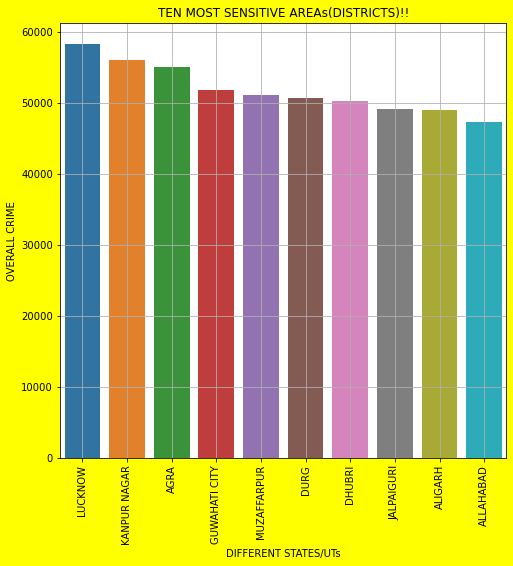

In [31]:
plt.figure(figsize=(8,8),facecolor='Yellow')
sns.barplot(x=sensitive['DISTRICT'],y=sensitive['OVERALL CRIME'])
plt.xticks(rotation=90)
plt.xlabel("DIFFERENT STATES/UTs")
plt.title("TEN MOST SENSITIVE AREAs(DISTRICTS)!!")
plt.grid()
plt.show()

## 4.3.1 What is impacting more crimes in sensitive areas?

In [32]:
sensitive_reg=sensitive_regions.reset_index().drop(['index'],axis=1).head(50)

<Figure size 1800x6480 with 0 Axes>

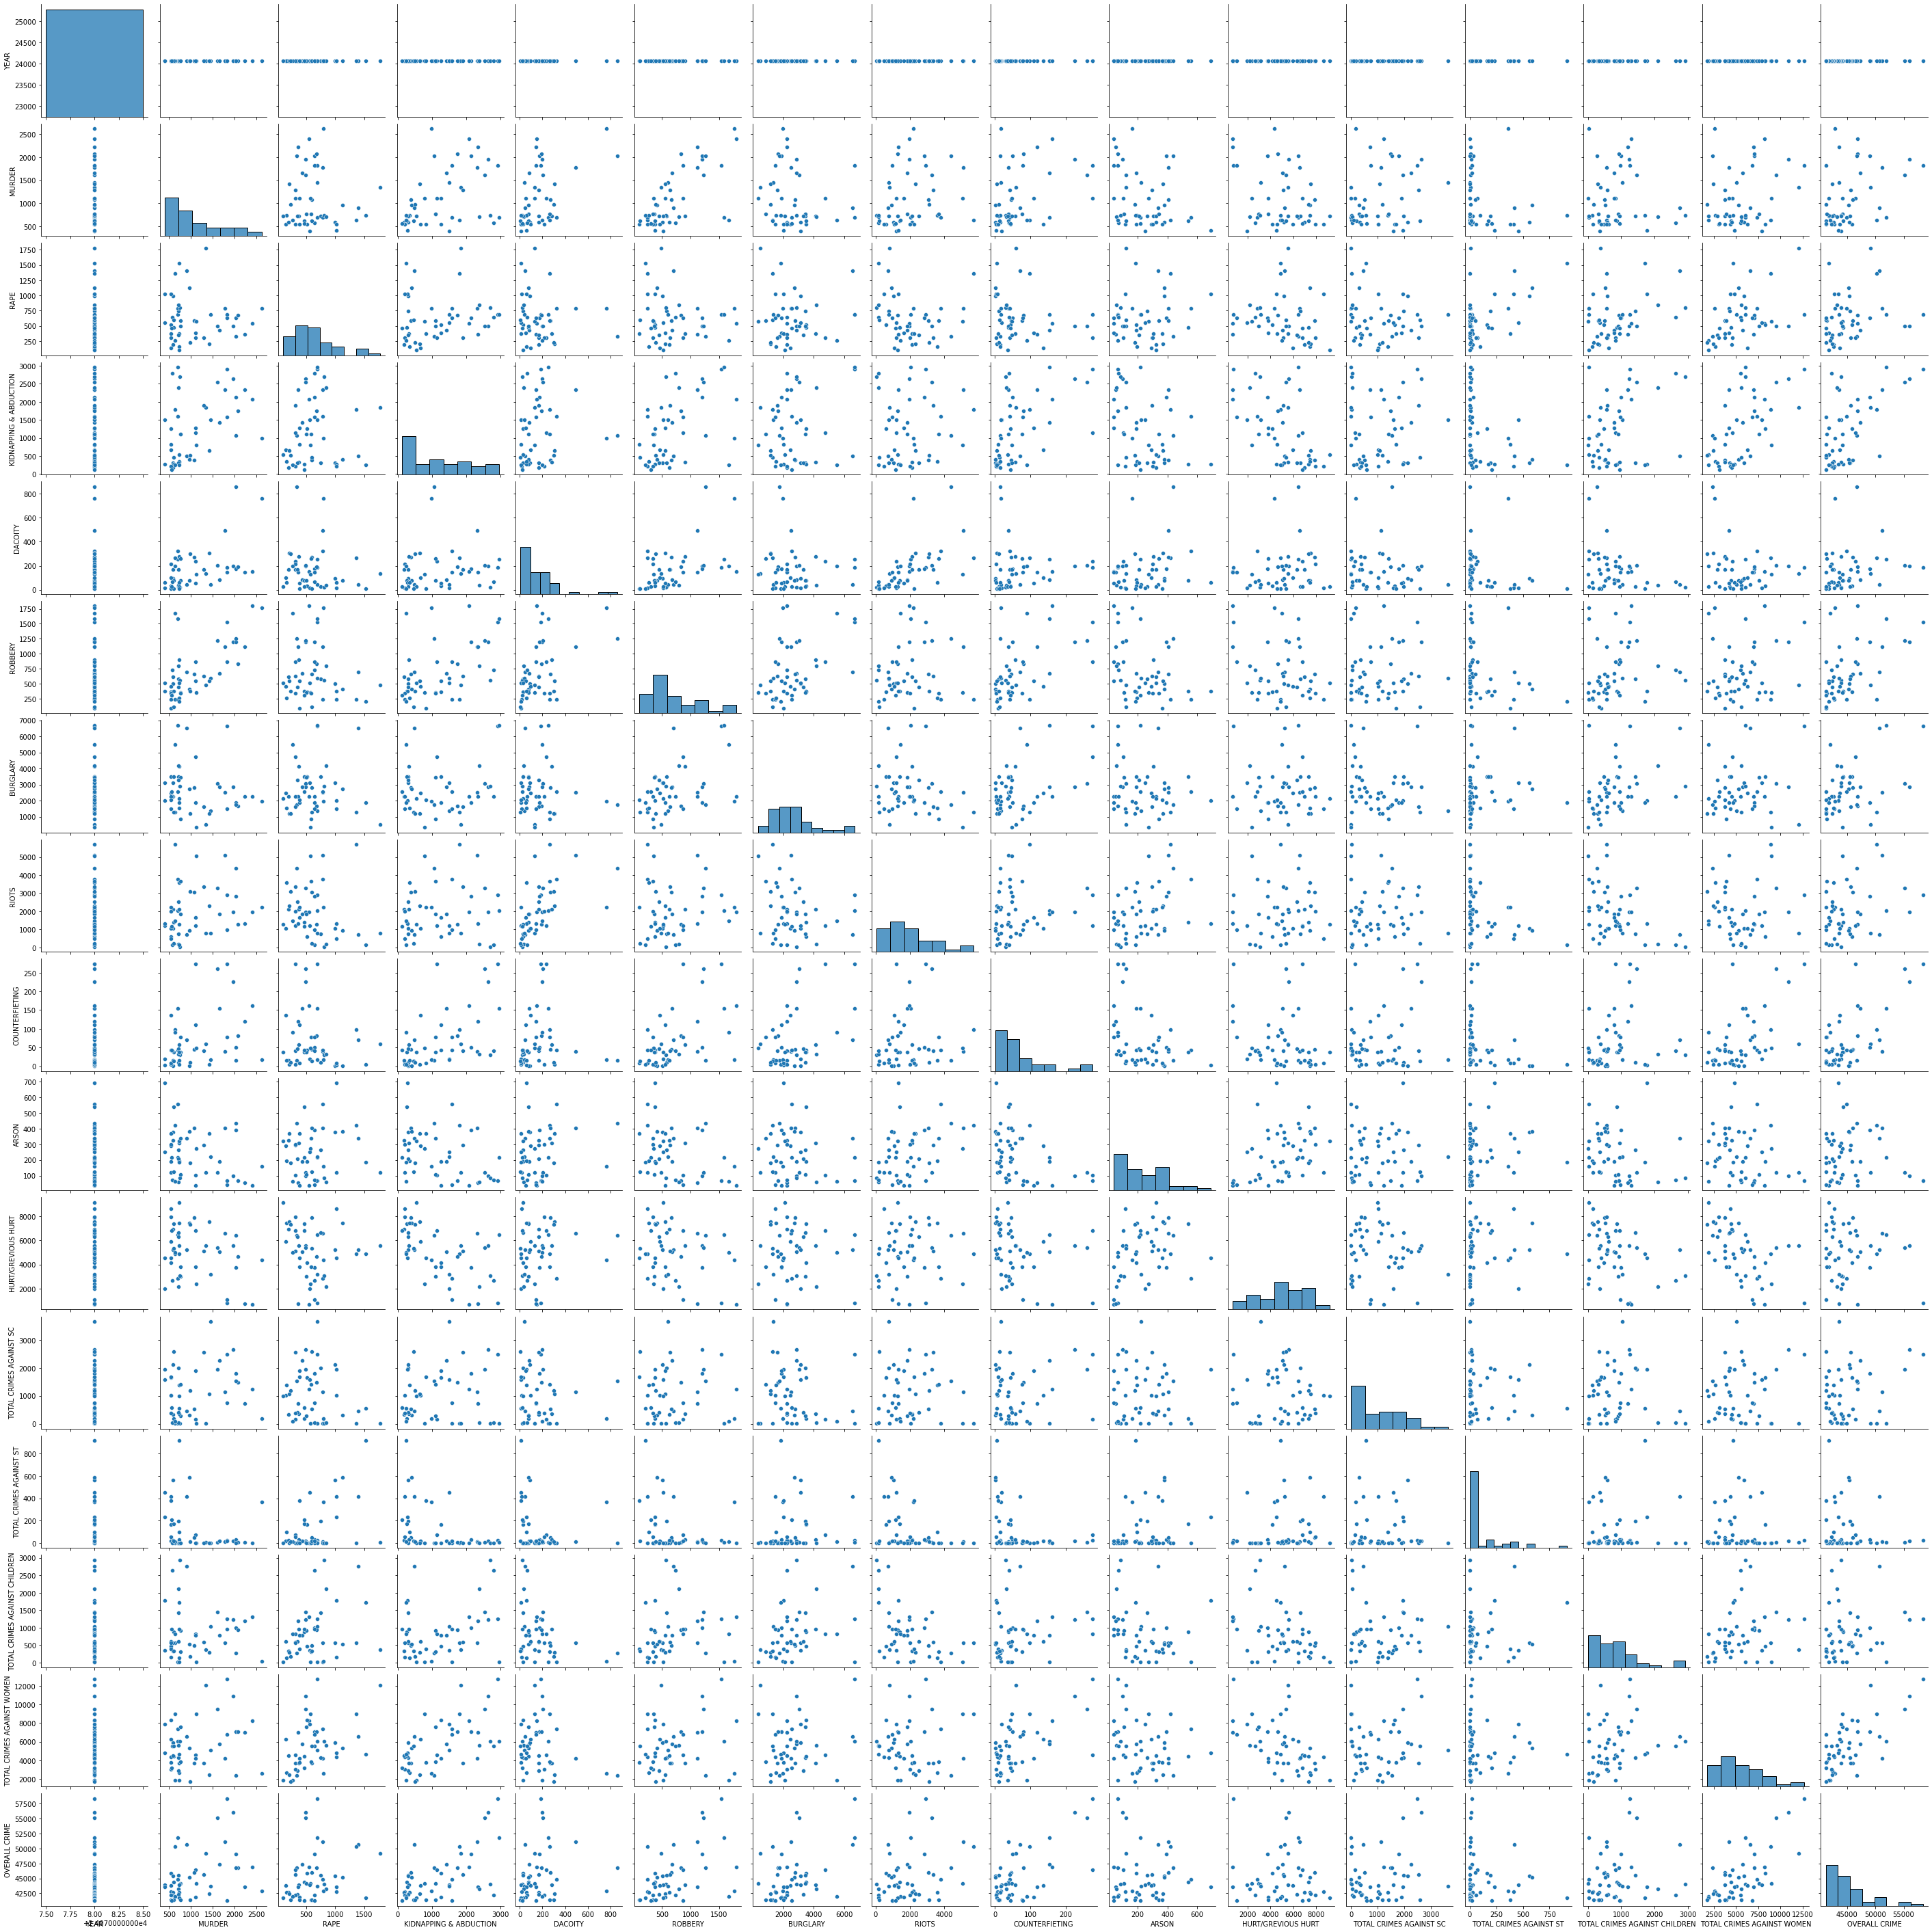

In [33]:
plt.figure(figsize=(25,90))
sns.pairplot(sensitive_reg)
plt.xticks(size=20)
plt.show()

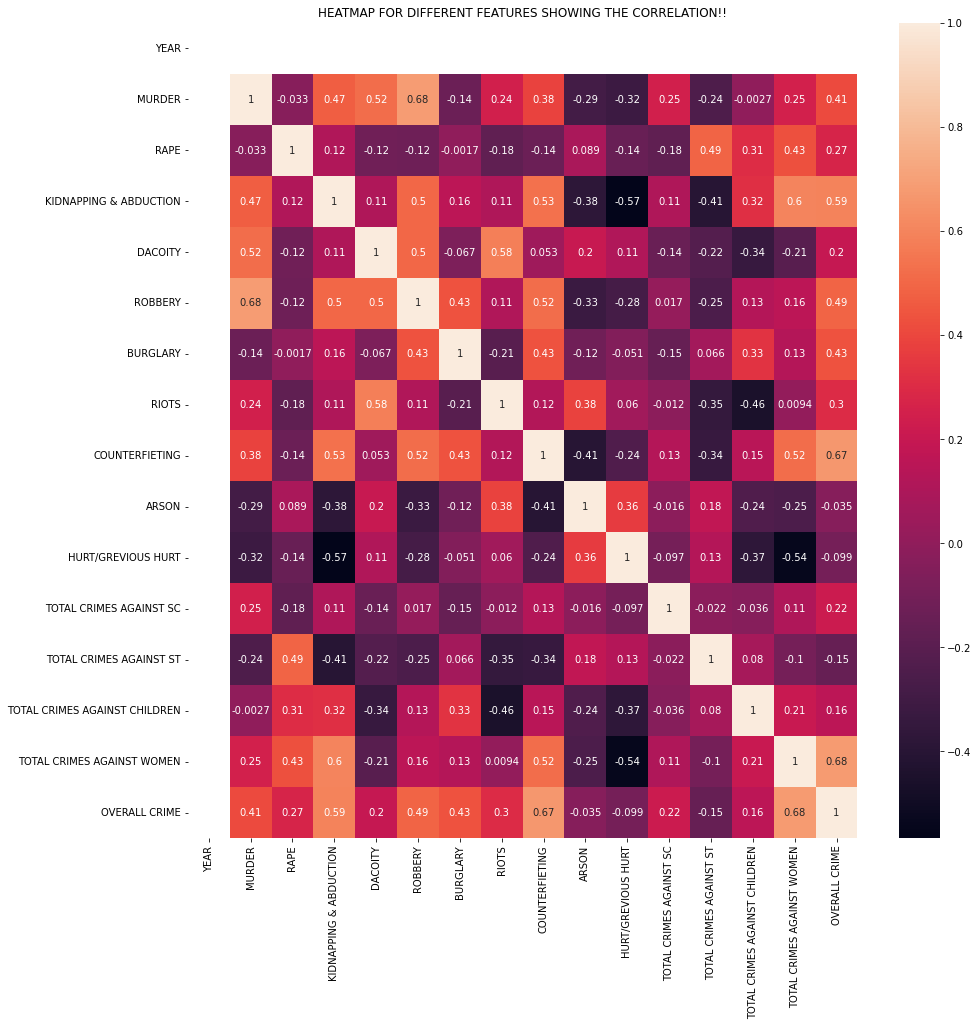

In [34]:
plt.figure(figsize=(15,15))
sns.heatmap(sensitive_reg.iloc[:,2:].corr(),annot=True)
plt.title("HEATMAP FOR DIFFERENT FEATURES SHOWING THE CORRELATION!!")
plt.show()

## 4.3.2 What needs to be done to reduce crime.

Reducing crime in India is a complex and multifaceted issue that requires a coordinated effort from various stakeholders, including the government, law enforcement agencies, civil society organizations, and the general public. Here are some measures that can help reduce crime in India:

Strengthen law enforcement: The government needs to allocate more resources and funds to law enforcement agencies to improve their capacity to prevent and investigate crimes. Police reforms should be implemented to make the force more accountable, efficient, and effective.

Address socio-economic factors: Poverty, unemployment, and lack of education are significant contributors to crime. The government needs to take measures to address these issues by creating job opportunities, improving access to education, and providing basic amenities like water, electricity, and healthcare.

Strengthen the justice system: The justice system in India is often slow and inefficient, which can lead to frustration and disillusionment among the public. Steps should be taken to streamline the justice system and make it more responsive to the needs of the people.

Raise public awareness: People should be made aware of the consequences of crime and the importance of reporting crime. Awareness campaigns should be conducted to educate people about their rights and responsibilities.

Improve community policing: Community policing can help build trust between the police and the community, leading to better crime prevention and investigation. The police should work closely with the community to identify and address local issues.

Use technology: Technology can play a significant role in preventing and solving crimes. The government should invest in modernizing the police force with advanced technology like CCTV cameras, drones, and digital forensics.

Reform the prison system: The prison system in India is overcrowded and inhumane, which can lead to the further radicalization of inmates. The government needs to take steps to improve the conditions in prisons and provide inmates with access to education and vocational training.

## 4.3.4 Capstone project overall story in your own words. Min 1000 words.

India is a diverse country with a population of over 1.38 billion people, and crime is a significant issue that affects its citizens. According to the data available from the National Crime Records Bureau (NCRB) for the year 2011, there were a total of 2.27 million reported cases of crime in India in 2011, a decrease of 4.54% from the previous year.

Crimes against women, including rape, sexual harassment, and domestic violence, continue to be a major concern in India. In 2011, there were 2,13,949 reported cases of crimes against women, and 11.04% of these cases were related to rape or sexual assault. Despite the enactment of stricter laws and increased public awareness, crimes against women remain a persistent problem in India.

Crimes against children including rape, kidnapping and abduction ,murder,traffacking,importation of girl are still the leading concerns in India. In 2011, there were 33,049 reported cases of crimes against children, and 21.51% of these cases were related to rape or sexual assault, and record 46.24% of the csaes are recorded of the murder only among differnt crimes against children.Even after various laws and stricter law enforcements being made to control the crimes against children a increase by 254.86% can be seen from the year 2001 to 2011.Madhya Pradesh records the most cases counting to 40,217 over the years and is followed by Uttar Pradesh and Maharastra counting the numbers to 29,969 and 27,845.In the year 2011 33,718 cases were recorded against SC.

Involvement of juveniles can also be seen as a serious threat to the society.Often misguided,mishandled the juveniles tends towards to opt the wrong ways. As its easy to influence them stricter laws should be made to overcome this issue.Total of 23,597 cases were recorded in 2001 which then increased to 27,471 in the year 2011.Madhya Pradesh have the most cases recording to 61,939 and manipur being the least in the cases.

Human right violation by the police too offers significant amount of share in total ipc crimes.Year 2009 have the most cases recorded in any year , counting the crimes to 664.There is 82.815% decrease in the cases from the year 2001 to 2011.Chattisgarh have the most cases of human right violation across the states 2001 to 2011.

Its also important to note that those who have the duty of maintaining the law and order in the state i,e the police department have also the cases of getting assaulted by the Rioutous_mob,extremists,in counter insurgency operation,border opeartions and many more.Uttar pradesh recorded 2150 cases from the year 2001 to 2011, Jammu Kashmir also holds the 4 position with the total count of 1142.0 .Almost 5% increase in the cases can be seen from the year 2001 to 2011.In JAMMU & KASHMIR a decrease in the cases of assaults and killing of the police/army personnel acan be seen as the cases in 2001 were 300 which reduced to 50 in 2010 , 83.33 % direct decrease in the cases.

Maharastra, Uttar Pradesh and Madhya Pradesh had the most cases for DACOITY/ROBBERY/BURGALARY/THEFT combined together with counts being Maharastra-7,17,452
Madhya Pradesh-3,89,927
UTTAR PRADESH-3,66,166

Overall, while there has been a increase in the number of reported crimes in India hinting that there are still significant challenges to be addressed. The government needs to continue its efforts to improve law enforcement, raise public awareness, and address socio-economic factors that contribute to crime.